# week4小テスト

##### 目次<br>
共通問題<br>
選択問題<br>
・[画像処理](#CNN)<br>
・[時系列解析](#RNN)<br>
・[自然言語処理](#NLP)<br>

## 共通問題
## Q1 主成分分析・クラスタリング（10点）

In [ ]:
#コード改変禁止
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline


# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# コード改変禁止
# データをインポート
data1 = pd.read_csv("./ALL/glass_data.csv")
data1.head()

### 1) 全ての変数について標準化を行い、「data_std」という変数に代入してください。その際、データフレームの状態を保ったまま代入してください。その後、各変数の平均値と標準偏差がそれぞれほぼ0と1になっていることを確認してください。（2点）

In [ ]:
# データフレームの状態で標準化を行う(1点)
#(値 - 平均) / 標準偏差

data_std = data1.apply(lambda x : ((x - x.mean())*1/x.std()+0),axis=0)
print(type(data_std))
# 各変数の平均と標準偏差がそれぞれ0と1になっていることを確認(1点)
print('----')
print(round(data_std.mean()))
print('----')
print(data_std.std())

### 2) 1)で標準化を行ったデータに対して、第５主成分まで取得し「X_pca」という変数に代入してください。そして、「X_pca」の初めの５サンプルだけ出力してください。（2点）

In [ ]:
# 第5主成分まで取得し代入(1点)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(data_std)
# 主成分を初めの5サンプルだけ出力してprint（1点）
print(X_pca[:5])

### 3) 今回モデルでの累積寄与率を表示してください。その後、パレートの法則を元に第何主成分までを用いれば、概ね良いと言えるかを答えてください。（2点）

In [ ]:
# 累積寄与率を出力（1点）
print(np.cumsum(pca.explained_variance_ratio_))

#### 第何主成分まで用いれば良いと考えられるか？（1点）  
第**4**主成分まで用いたほうが良いと考えられる。

### 4) エルボー法を用いて、クラスタ数kがk=1～9のときについてのSSEを示したグラフを表示しなさい。そして、グラフをもとに最適なクラスタ数を判断し、Markdown形式で答えてください。（2点）

In [ ]:
#?を変えていきましょう。
# 各kで算出されたSSEを格納するリストを定義
distortions = []

# kを変えながらk-means法を実行（全部できて1点）
for k  in range(1,10):              # 1~9クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を10回に指定
                max_iter=300,       # 一回の最適化の繰り返し回数を300回に指定
                random_state=0)     # 乱数の生成状態を指定（０）
    km.fit(X_pca[:, 0:2])           # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,10), distortions,marker='o') # 1から9でのSSEを順にプロット
plt.xticks([i for i in range(1, 10)])         # 横軸のメモリを1から9までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### 最適なクラスタ数は何であると考えられるか？（1点）  
最適なクラスタ数は**4**

### 5) あなたが回答した最適クラスタ数でのクラスタリングを行い、第1主成分,第２主成分を軸とする２次元平面上のサンプル散布図をクラスタリング結果のラベルで色分けしたグラフを表示してください。また、セントロイドも同時に表示してください。（2点）

なお、k-means法を実行する際はinit=k-means++で実行してください

In [ ]:
#そのまま実行
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# クラスタリングの結果を出力（全部できて2点）
# クラスタごとにサンプルの散布図とクラスタの中心をプロット
km = KMeans(n_clusters=4,           # クラスタ数
                init='k-means++',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定（１０）
                max_iter=300,       # 一回の最適化の繰り返し回数を指定（３００）
                random_state=0) 

# 結果の表示
kmeans_plot(4, km, X_pca[:,0:2])

<a id='CNN'></a>
## 選択問題
## Q2 画像処理（20点）

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#コード改変禁止
#ライブラリのインポート必ず実行すること
#python 3.6 系 keras 2.0.8 を想定している。

from __future__ import absolute_import, division, print_function, unicode_literals

import itertools
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam, Adagrad

%matplotlib inline

## 問1 画像データの読み込み （2点）
今回はCNNを用いた画像の分類を行う。画像データとして、[CIFAR10](http://www.image-net.org)からダウンロードしたものの一部を使う。  
![](http://cdn-ak.f.st-hatena.com/images/fotolife/u/ultraist/20141108/20141108185409.png)

### (1) 画像データ(X_train, X_test, y_train, y_test)をインポートせよ。(2点)

data_lightのファイルの中に、X_train,X_test,y_train,y_test.pickleの形で保存されているので、それらを全てインポートすること。

In [ ]:
#全て正しくインポートできて2点
#下の@@@@@@@@を正しいパスにすること。
with open('@@@/x_train.pickle','rb') as f:
    X_train = pickle.load(f) 

with open('@@@/y_train.pickle','rb') as f:
    y_train = pickle.load(f) 
    
with open('@@@/x_test.pickle','rb') as f:
    X_test = pickle.load(f) 
    
with open('@@@/y_test.pickle','rb') as f:
    y_test = pickle.load(f) 

##### 今回はメモリの都合上35枚の画像データのみを扱う。

In [ ]:
#コード改変禁止
X_train = X_train[:35]
X_test = X_test[:35]
y_train = y_train[:35]
y_test = y_test[:35]

In [ ]:
#画像データの確認
#コード改変禁止
num_classes = 10
cifar10_labels = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
def plot_head(X, y):
    plt.figure(figsize=(16,5))
    for index in range(30):
        plt.subplot(3, 10, index+1)
        plt.imshow(X[index])
        plt.axis('off')
        plt.title(cifar10_labels[y[index][0]])

plot_head(X_train, y_train)

## 問2 画像データの前処理（7点）
このままでは学習に用いることのできる画像データ数が少ないため、水増しを行う。

### (1) img(画像),x(右上のx座標),y(右上のy座標),px(pixel幅)を引数にとり、(x, y),(x+px, y),(x,y+px),(x+px, y+px)を四隅としてcropした後に、縦32pixel$\times$横32pixelに拡大した画像を返すcropping関数を定義しなさい。（2点）

In [ ]:
def cropping(img, x, y, px):
    #(x, y),(x+px, y),(x,y+px),(x+px, y+px)を四隅としてcrop　(1点)
    cropped = 
    #サイズを(32,32)に拡大　(1点)
    cropped = 
    return cropped

### (2) 画像を引数にとり、左右反転した画像を返すfrip関数を定義しなさい。（1点）

In [ ]:
def flip(img):
    #左右反転　(1点)
    flipped = 
    return flipped    

上記のcropping関数とflip関数を組み込み、画像を水増しする。

In [ ]:
#コード改変禁止
#必ず実行すること
def preprocess(X, y):
    new_X = np.ndarray((0, 32,32, 3),dtype=np.uint8)
    new_y = np.ndarray((0),dtype=int)
    for index, img in enumerate(X):
        
        #crop & flip
        for i, j in itertools.product(range(3), range(3)):
            cropped = cropping(img, i*4, j*4, 24)
            flipped = flip(cropped)
        
            new_X = np.concatenate([new_X, cropped.reshape(1,32,32,3), flipped.reshape(1,32,32,3)],axis=0)
            new_y = np.concatenate([new_y, y[index], y[index]],axis=0)
    
    #シャッフル
    cnt = new_X.shape[0]
    
    shuffle_array = np.arange(cnt)
    np.random.shuffle(shuffle_array)
    
    new_X = new_X[shuffle_array]
    new_y = new_y[shuffle_array]
    
    new_y = new_y.reshape(-1, 1)
            
    return new_X, new_y

### (3) 訓練データにpreprocess関数を適用し、X_train, X_test, y_train, y_testの形状を確かめよ。（2点）

In [ ]:
#関数の適用(1点)
X_train, y_train = 

#各データの形状(shape)の確認(1点)
print()
print()
print()
print()


#以下のコードは改変禁止。関数適用後の画像データについての確認。
plot_head(X_train, y_train)

### (4) X_train, X_testについて、kerasが処理できるfloat型に変換した後に正規化の処理を施せ。（2点）

In [ ]:
#kerasが処理できる数値型データに変換　(1点)
X_train = X_train.astype('f')
X_test = X_test.astype('f')
# 正規化　（１点）
X_train /= 255
X_test /= 255

In [ ]:
#コード改変禁止
# 正解ラベル(y_trainとy_test)をOne-Hot表現に変換　
# 10種類に分類することに注意
y_train = np.identity(10)[y_train.reshape(-1)].astype('i')
y_test = np.identity(10)[y_test.reshape(-1)].astype('i')

print("y_train.shape: ",y_train.shape)
print("y_test.shape: ",y_test.shape)

## 問3 CNNの構築及び学習の実行 （11点）
![](https://aistdcontents.blob.core.windows.net/image/deep_image.png)

#### <div style="text-align: center;"><font color="Red">※2つの畳み込み層については、paddingを施して画像サイズが変わらないようにしてください。stridesはデフォルトのままで良いです。</font></div>

### (1) 上の図を参考にしてCNNのmodelを構築せよ。(5点)

### ※ **DropoutやCNNのpaddingやstrideについての指示もあるので見逃さないこと。**

In [ ]:
# モデルの定義(計5点)
model =

## ２次元畳み込み層１ （1点）

## ２次元畳み込み層２ （1点）

## maxプーリング層 （1点）

## 全結合層１ （1点）

## 全結合層２ （1点）


model.summary()

### (2) 損失関数を適切に設定し、以下のmodelのコンパイルを完成させよ。 (1点)

In [ ]:
#コンパイルの完成(損失関数の欄を埋める)(1点)
model.compile(loss = ? ,
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics = ['accuracy'])

### (3) CNNの学習を実行しなさい。ただしbatch_size=35,epochs=12とすること。(1点)

In [ ]:
hist = 

### (4) 損失関数のグラフと精度のグラフを描画しなさい。(2点)
**ヒント：hist.historyに辞書型配列の形で損失値や精度が格納されている。**

<span style="color: red; ">ランダムシードの関係で、以下のグラフと全く同じグラフが出力されるという訳ではないことに注意してください。</span>

In [ ]:
## 損失関数のグラフ(1点)
def plot_history_loss(hist):
    """
    ここに記入
    """
    
plot_history_loss(hist)

In [ ]:
## 精度のグラフ(1点)
## hist.historyに辞書型で格納されている。
def plot_history_acc(hist):
     """
    ここに記入
    """
    
plot_history_acc(hist)

### (5) プロットしたグラフから学習の傾向を分析しなさい。（簡単で構いません。） （1点）

#### 解答欄:

### (6) 精度を向上するためにどのような工夫が必要か。 （1点）

#### 解答欄: 


<a id='RNN'></a>
## 選択問題
## Q3 時系列処理（20点）

この問題では時系列データの回帰を行います。　<br>
５年分の毎日の最低気温のデータをLSTMを用いて学習し予測を行います。

In [1]:
#ライブラリのインポート
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 問1 データの観察(4点)

### (1)下記の`url`から`daily-min-temperatures.csv`をカレントディレクトリにダウンロードしてください。(1点)

In [ ]:
from urllib import request

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
request.urlretrieve(url, './daily-min-temperatures.csv')

### (2)`daily-min-temperatures.csv`から初めの5年分のデータを`df`として読み込み、`df`の最初の５つのデータを表示してください。(2点)

`daily-min-temperatures.csv`には10年分のデータが含まれていますが、可視化する際にデータが多すぎると分かりにくいため、半分の５年分を用います。

In [2]:
#csvの読み込み
df = pd.read_csv('daily-min-temperatures.csv')
df = df.iloc[:365*5, :]
#最初の５つのデータを表示
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


データを可視化すると以下のようになります。

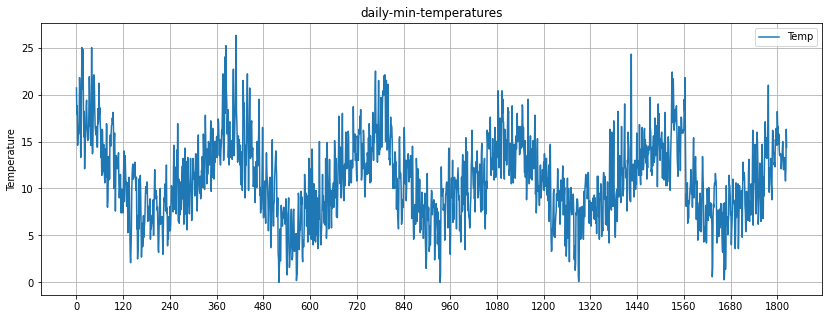

In [3]:
#コード改変禁止
#データの可視化
plt.figure(figsize=(14, 5))
plt.plot(df.Temp, label='Temp')
plt.xticks(np.arange(0, len(df), 120))
plt.title('daily-min-temperatures')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid()
plt.show()

### (3)以下の`seasonal_decompose`の結果を見て、`Seasonality(周期変動, 季節性)`からは主に何が読み取れるか説明してください。(1点)

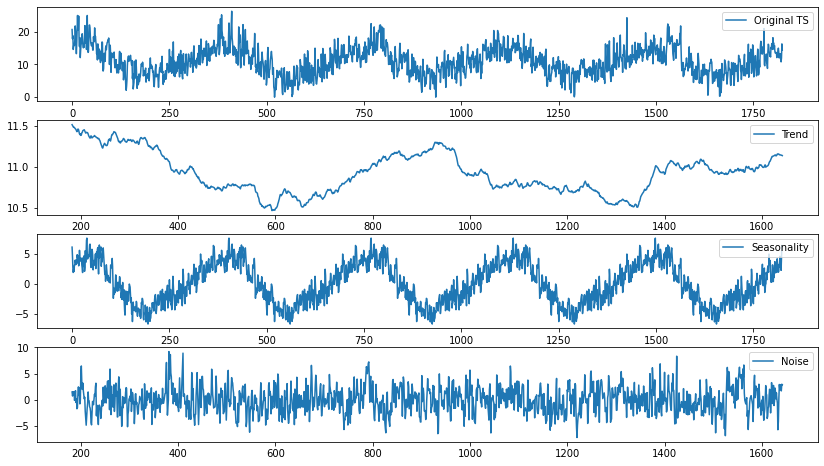

In [4]:
#セルの内容は変更せずに実行してください
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df.Temp
decomposition = seasonal_decompose(ts, period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
noise = decomposition.resid
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(ts, label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='best')

#### **解答欄**：　大体一年ごとに谷を作っている

## 問2 データの前処理 (5点)

### (1)df['Temp']の値が0~1になるように正規化してください。(1点)

df['Temp']の最大値は後で正規化されたデータを元のスケールに復元するために用いるので、scalerという変数に保存しておいてください。

In [5]:

#最大値の保存
scaler = df['Temp'].values.astype('f')
print(scaler)
#正規化
scale=scaler.max()
scaler/=scale
print(scale)
print(scaler)


[20.7 17.9 18.8 ... 12.  16.3 14.4]
26.3
[0.7870723  0.6806084  0.7148289  ... 0.45627376 0.61977184 0.5475285 ]


### (2)以下の画像を参考に入力の系列`X`と正解の系列`y`を1タイムステップずつずれた形で定義してください。(1点)

<img src='https://ai-std-contents.azureedge.net/image/dk6-20.png' width=50%>

In [6]:
#Xとyの定義(1点)
X = scaler[:-1]
y = scaler[1:]

### (3)Kerasのモデルの入力に合わせるために、`X`と`y`のshape(次元)を変換してください。(1点)

In [7]:
X = X.reshape(len(X), 1, 1)
y = y.reshape(len(y), 1)
#Xとyのshapeを確認
print('X:', np.shape(X), ' y:', np.shape(y))

X: (1824, 1, 1)  y: (1824, 1)


### (4)`X`と`y`をtrainデータとtestデータに分割してください。(2点)

ただし、はじめの７割のデータ(小数以下切り捨て)をtrainデータとして用いてください。

In [8]:
#train_sizeははじめの７割のデータ(小数以下切り捨て)
train_size = int(len(scaler) * 0.7)
print(f'train_size : {train_size}')

#データの分割
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

train_size : 1277


In [9]:
#コード改変禁止
#データのshapeの確認
print('X_train:', X_train.shape)
print('X_test :', X_test.shape)
print('y_train:', y_train.shape)
print('y_test :', y_test.shape)

X_train: (1277, 1, 1)
X_test : (547, 1, 1)
y_train: (1277, 1)
y_test : (547, 1)


## 問3 学習と評価(11点)

In [10]:
#ライブラリのインポート
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM
from tensorflow.keras.optimizers import Adam

2021-08-21 13:11:04.288728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/lib32/nvidia-340
2021-08-21 13:11:04.289820: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### (1)30個のLSTMブロックを持つモデルを定義し、損失関数に`mean_squared_error`, 最適化アルゴリズムに`Adam`を用いてコンパイルしてください。(2点)

In [11]:
# モデルの定義
model = Sequential()
model.add(LSTM(30, batch_input_shape=(None, 1, 1)))
model.add(Dense(1))


#コンパイル

#回帰なので損失関数に誤差二乗和を用いる
model.compile(loss='mean_squared_error', optimizer=Adam())
# ミニバッチに含まれるサンプル数を指定
batch_size = 32

# epoch数を指定
n_epoch = 50

#モデルの構成の確認
model.summary()

2021-08-21 13:11:09.804459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/lib32/nvidia-340
2021-08-21 13:11:09.804837: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-21 13:11:09.804994: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-G5L6GFS): /proc/driver/nvidia/version does not exist
2021-08-21 13:11:09.806219: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30)                3840      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


### (2)モデルの学習を行ってください。(2点)

In [12]:
hist = model.fit(X_train,
                 y_train,
                 epochs=n_epoch,
                 validation_data=(X_test, y_test),
                 verbose=0,
                 batch_size=batch_size)

2021-08-21 13:11:10.692281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


### (3)モデルの損失の推移を可視化してください。(2点)

`hist.history`は辞書型のオブジェクトで`loss`と`val_loss`の推移が記録されています。

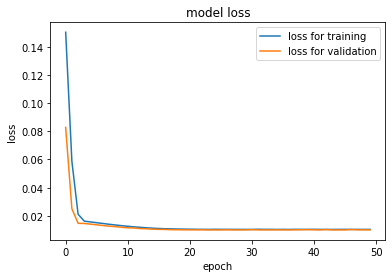

In [13]:
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()


plot_history_loss(hist)

### (4)以下の画像を参考にモデルの推測結果を可視化してください。(3点)

ただし、モデルの出力は0~1に正規化された値であることに注意してください。

<img src='./RNN/img/pred.png'>

In [1]:
# 実測値が正しいスケールでプロットされている（1点）
#予測値が正しいスケールで正しい日付にプロットされている(1点)
# train_sizeがわかるような赤線が引いてある(1点)

#元のスケールに復元する
print(scaler)
print('------------------------')
scaler *= scale
print(scaler)
print('----------------------')
print(scale)
#予測データをプロットするための横軸（日数）の数列を作る
print('----------------------')
print(X)
y_pred = model.predict(X/scale) * scale
print('-----------------')
print(y_pred)
# プロットは下でします
plt.plot(scaler, color='blue') # 実測値
plt.plot(y_pred, color='red') # 予測値
plt.vlines(train_size, 0, 25, colors='red', linestyles='dotted', label='')
# plt.xlim(train_size, 1900)
plt.show()

NameError: name 'scaler' is not defined

### (5)trainデータとtestデータについて、それぞれのRMSEを出力してください。(2点)

In [144]:
from sklearn.metrics import mean_squared_error as mse
train_rmse = (mse(y_train, model.predict(X_train)) ** (1/2))
test_rmse = (mse(y_test, model.predict(X_test)) ** (1/2))
print('train_rmse：',train_rmse)
print('test_rmse：',test_rmse)

train_rmse： 7.44179071349346
test_rmse： 6.872151842564716


<a id='NLP'></a>
## 選択問題
## Q3 自然言語処理（20点）

### 日本の有名な小説４作品を用いて、文章の類似度判定をします。
データは青空文庫にあるtxtファイルです。  
[青空文庫](https://www.aozora.gr.jp/)は、誰にでもアクセスできる自由な電子本を、図書館のようにインターネット上に集めようとする活動です。  
著作権の消滅した作品と、「自由に読んでもらってかまわない」とされたものを、テキストとＸＨＴＭＬ（一部はＨＴＭＬ）形式に電子化した上で揃えています。  

In [ ]:
# 改変禁止（実行のみ）
#ライブラリのインポート
import numpy as np
import pandas as pd
import re

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

## 問１データの読み込み(4点)

rashomon_test.txt を、rashomonとして読み込む<br>
エンコーディングは、UTF-8 とすること。

In [ ]:
# 'rashomon_test.txt'を、rashomonとして読み込み(1点)
with open('./NLP/rashomon_test.txt', 'r', encoding='UTF-8') as rashomon:
    rashomon = rashomon.read()

torokko_test.txt を、torokko として読み込む

In [ ]:
# torokko_test.txt を、torokko として読み込む(1点)
with open('./NLP/torokko_test.txt', 'r', encoding='UTF-8') as torokko:
    torokko = torokko.read()

gakumonno_susume_test.txt を、gakumonとして読み込む

In [ ]:
# gakumonno_susume_test.txt を、gakumonとして読み込む(1点)
with open('./NLP/gakumonno_susume_test.txt', 'r', encoding='UTF-8') as gakumon:
    gakumon = gakumon.read()

bocchan_test.txt を、bocchan として読み込む

In [ ]:
# bocchan_test.txt を、bocchan として読み込む(1点)
with open('./NLP/bocchan_test.txt', 'r', encoding='UTF-8') as bocchan:
    bocchan = bocchan.read()

In [ ]:
#'bocchan_test.txt'の中身を確認（画面の邪魔になる場合はコメント化してください）
print(bocchan)

## 問２ データクレンジング(6点)

In [ ]:
# 改変禁止（実行のみ）
duty_string = 'C｜o《rai、ebisv》m、pl［ha。fybzk］et。　e'

前処理を行う関数`remove_symbol` を下記に定義し、
上で定義している`duty_string` の出力結果が`complete` となるようにしなさい。

In [ ]:
def remove_symbol(text):
    '''
    input : text
    output: 不要な文字を除かれた "removed"
    '''
    # 以下、つづきを記述せよ
    #《[^》]*》
    pattern = re.compile(r"(［[^］]*］)")
    removed = re.sub(pattern, " ", text)
    
    return removed

In [ ]:
# 改変禁止（実行のみ）

# 正解判定用
print(f'前処理後の出力 : {remove_symbol(duty_string)}')
print('')
print(f'正解判定 : {remove_symbol(duty_string) == "Complete"}')

In [ ]:
# 改変禁止（実行のみ）

# remove_symbol関数を使用して、４種の文章から不要な文字を削除
rashomon = remove_symbol(rashomon)
torokko  = remove_symbol(torokko)
gakumon  = remove_symbol(gakumon)
bocchan  = remove_symbol(bocchan)

In [ ]:
# 改変禁止（実行のみ）

# 後の解析のために、一つのリストでまとめておく
docs = [rashomon, torokko, gakumon, bocchan]

## 問３トークン化 (5点)

形態素解析を行って、トークン化（単語分割、分かち書き、などともいう）をする

In [ ]:
# インストールが済んでいなければコメントアウトを外して実行してください

# 形態素解析をし、トークン化するjanomeをインストールする
# pip install janome

#### トークン化のための関数を作成せよ(5点)

In [ ]:
def wakachi(text):
    '''
    input : text
    output: docs (トークン化され、リストに単語ごとに格納された状態)
    
    '''
    # 以下、つづきを記述せよ
    from janome.tokenizer import Tokenizer
    t = Tokenizer()
    tokens = t.tokenize(text)
    for token in tokens:
        docs = token
    return docs

In [ ]:
# 改変禁止（実行のみ）

# 正解判定用
text = '私は東京都に住んでいます'
answer = ['私', 'は', '東京', '都', 'に', '住ん', 'で', 'い', 'ます']

print(f'output : {wakachi(text)}')
print('')
print(f'正解判定 : {wakachi(text)==answer}')

#### ベクトル化

In [ ]:
# 改変禁止（実行のみ）

# 単語のベクトル化するための関数
def vecs_array(documents):
    from sklearn.feature_extraction.text import TfidfVectorizer
    docs = np.array(documents)
    vectorizer = TfidfVectorizer(analyzer=wakachi, binary=True, use_idf=False)
    vecs = vectorizer.fit_transform(docs)
    return vecs.toarray()

#### cos類似度判定
cos類似度判定とは、2つの文章をベクトルとして表したとき、2本のベクトルがどれくらい同じ向きを向いているのかを表す指標です。  
完全に同じ向き、同じ大きさの場合に１となります。

[詳しくはこちらをご覧ください](https://analysis-navi.com/?p=569%E4%BB%8A%E5%9B%9E%E3%81%AF%E4%BE%8B%E9%A1%8C%E3%81%A8%E3%81%97%E3%81%A6%E3%80%81%E4%BB%A5%E4%B8%8B%E3%81%AE3%E3%81%A4%E3%81%AE%E6%96%87%E7%AB%A0%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6%E3%80%81%E3%81%9D%E3%82%8C%E3%81%9E%E3%82%8C%E3%81%AE%E9%A1%9E%E4%BC%BC%E5%BA%A6%E3%82%92%E8%A8%88%E7%AE%97%E3%81%97%E3%81%A6%E3%81%BF%E3%81%BE%E3%81%99%E3%80%82%E6%96%87%E7%AB%A0A%E3%80%8C%E7%A7%81%E3%81%AF%E7%8A%AC%E3%81%8C%E5%A5%BD%E3%81%8D%E3%81%A7%E3%81%99%E3%80%82%E3%80%8D%E6%96%87%E7%AB%A0B%E3%80%8C%E7%A7%81%E3%81%AF%E7%8A%AC%E3%81%8C%E5%AB%8C%E3%81%84%E3%81%A7%E3%81%99%E3%80%82%E3%80%8D%E6%96%87%E7%AB%A0C%E3%80%8C%E7%A7%81%E3%81%AF%E7%8A%AC%E3%81%AE%E3%81%93%E3%81%A8%E3%81%8C%E3%81%A8%E3%81%A6%E3%82%82%E5%A5%BD%E3%81%8D%E3%81%A7%E3%81%99%E3%80%82%E3%80%8D%E5%BD%A2%E6%85%8B%E7%B4%A0%E8%A7%A3%E6%9E%90%E6%96%87%E7%AB%A0%E3%82%92%E5%8D%98%E8%AA%9E%E3%81%94%E3%81%A8%E3%81%AB%E3%83%90%E3%83%A9%E3%83%90%E3%83%A9%E3%81%AB%E3%81%99%E3%82%8B%E3%80%8C%E5%BD%A2%E6%85%8B%E7%B4%A0%E8%A7%A3%E6%9E%90%E3%80%8D%E3%82%92%E8%A1%8C%E3%81%86%E3%83%91%E3%83%83%E3%82%B1%E3%83%BC%E3%82%B8%E3%81%AFMeCab%E3%80%81Janome%E3%80%81%E3%81%AA%E3%81%A9%E5%B9%BE%E3%81%A4%E3%81%8B%E3%81%82%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82)

In [ ]:
# 改変禁止（実行のみ）

# cos類似度の算出
from sklearn.metrics.pairwise import cosine_similarity
cs_array = np.round(cosine_similarity(vecs_array(docs), vecs_array(docs)),3)
name = ['羅生門', 'トロッコ', '学問のすゝめ', '坊ちゃん']
cs_data = pd.DataFrame(cs_array)
cs_data.index = name
cs_data.columns = name

print('cos類似度')
cs_data.head()

## 問3 最も相関のある2作品を答えてください。(5点)
ヒント : 相関係数行列のような見方で考えてください。

回答欄： 